### This jupyter notebook is to unit-test CFE model run

## Preparation

In [1]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [2]:
# Input: Mahurangi data for 3 yrs
# forcing: Mahurangi/mahurangi_1998_2001.csv
# observed: test_sm_basinavg

# Input: Little Washita data for 12 yrs
# forcing: LittleWashita/little_washita_2006_2012.csv
# observed: test_sm_basinavg


# Parameter: only limited number of parameters

input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/LittleWashita/little_washita_2006_2012.csv", 
    "catchment_area_km2": 601, 
    "soil_params": {
        "bb": 2, 
        "satdk": 0.0004, 
        "slop": 0.2580415250974201, 
        "satpsi": 0.131, 
        "smcmax": 1, 
        "wltsmc": 0.0, 
        "D": 2
        }, 
        "alpha_fc": 0.18, 
        "max_gw_storage": 50, 
        "Cgw": 5.266971269144725, 
        "expon": 0.003, 
        "K_lf": 0.0001, 
        "refkdt": 12, 
        "K_nash": 0.25869443146653426, 
        "trigger_z_fact": 0.25, 
        "nash_storage": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
        "giuh_ordinates": [0.0,0.0,0.0,0.0,0.0,0.1, 0.4, 0.2, 0.2, 0.1], 
        "stand_alone": 1, 
        "unit_test": 1, 
        "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/LittleWashita/test_sm_basinavg.csv"
        }

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

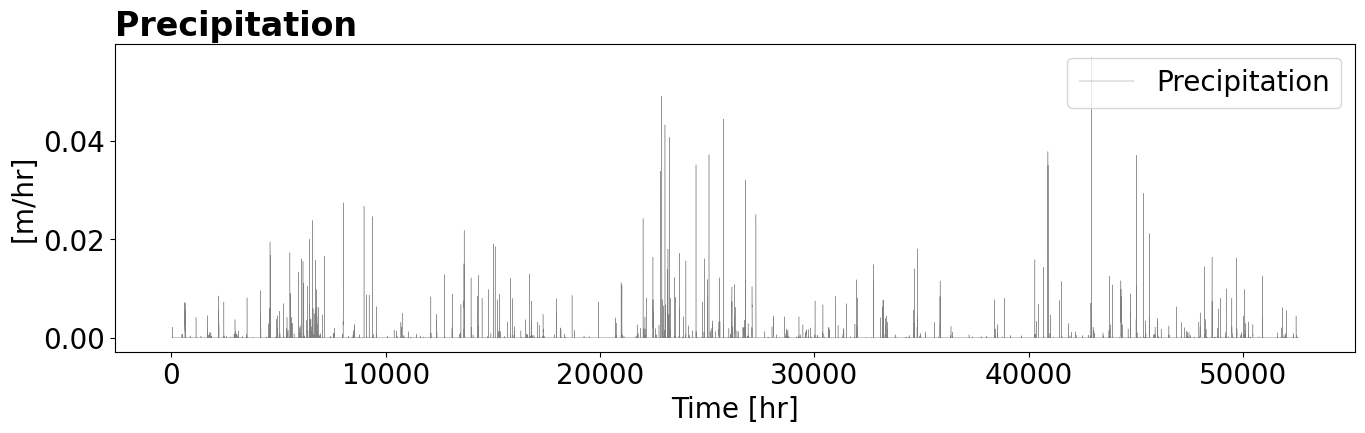

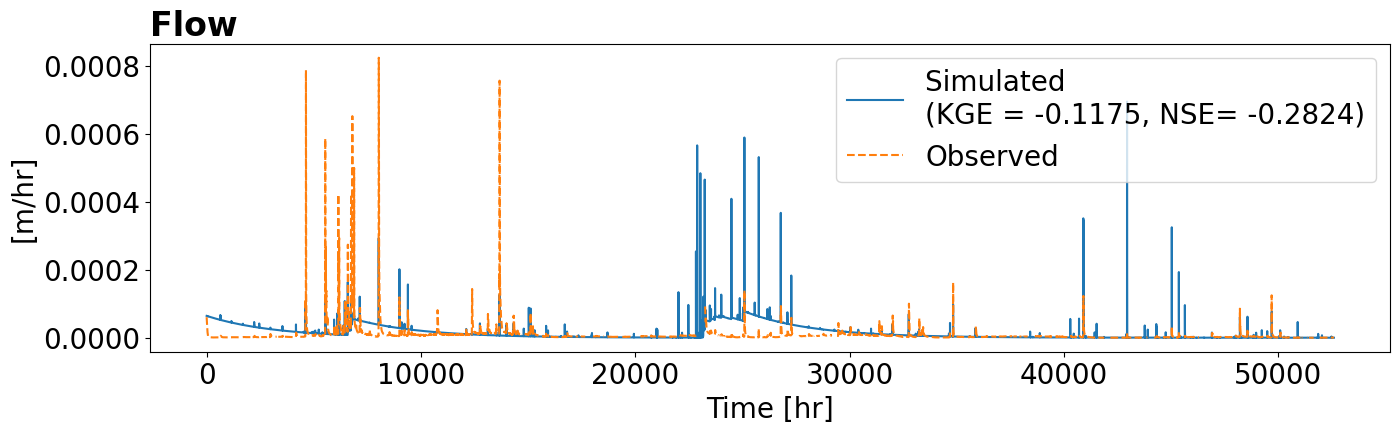

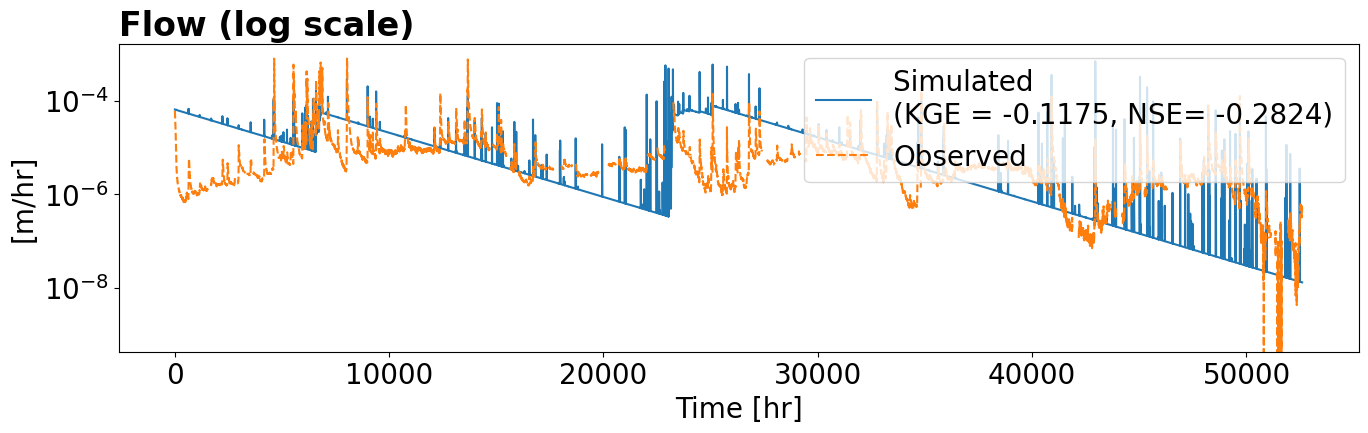

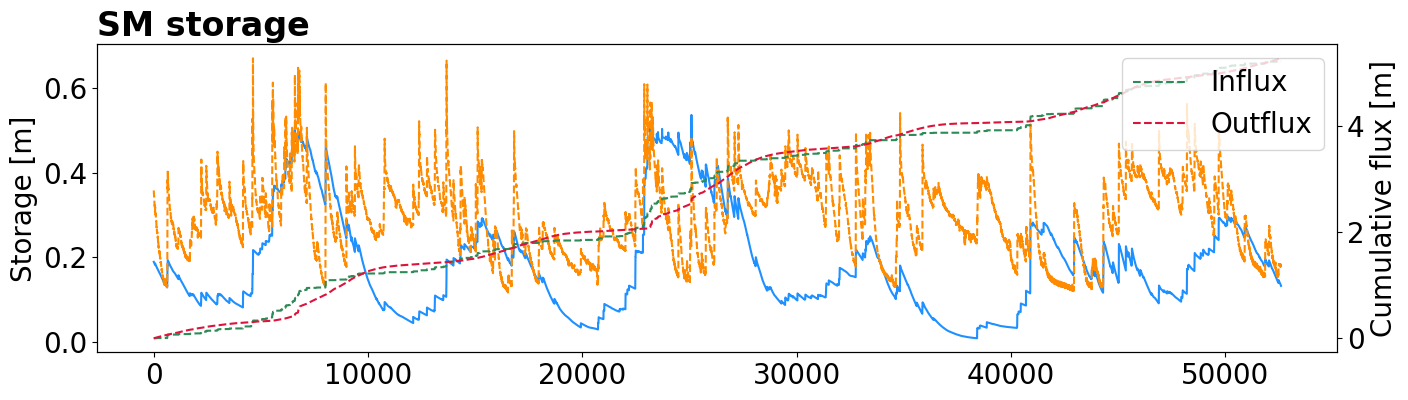

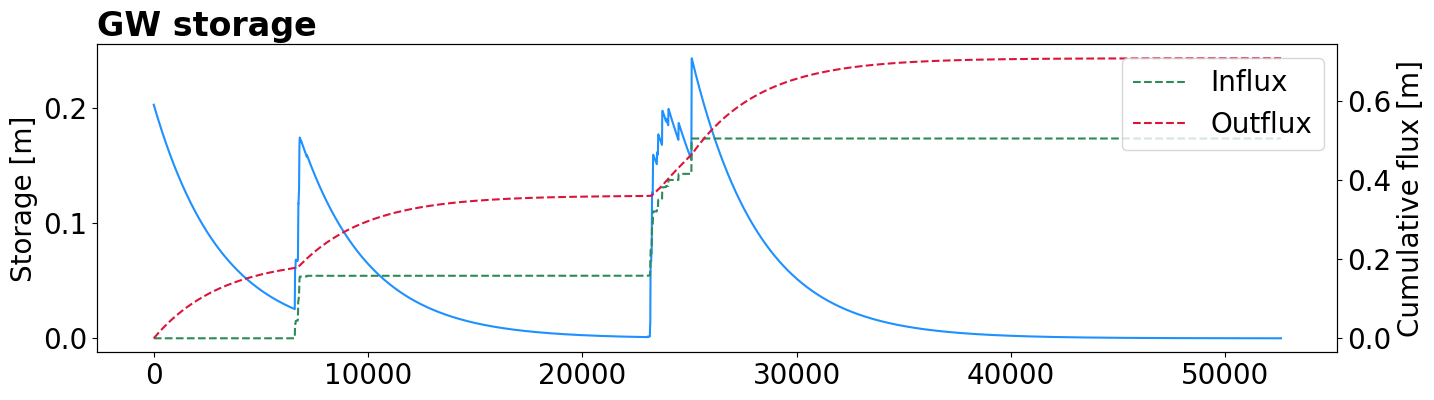

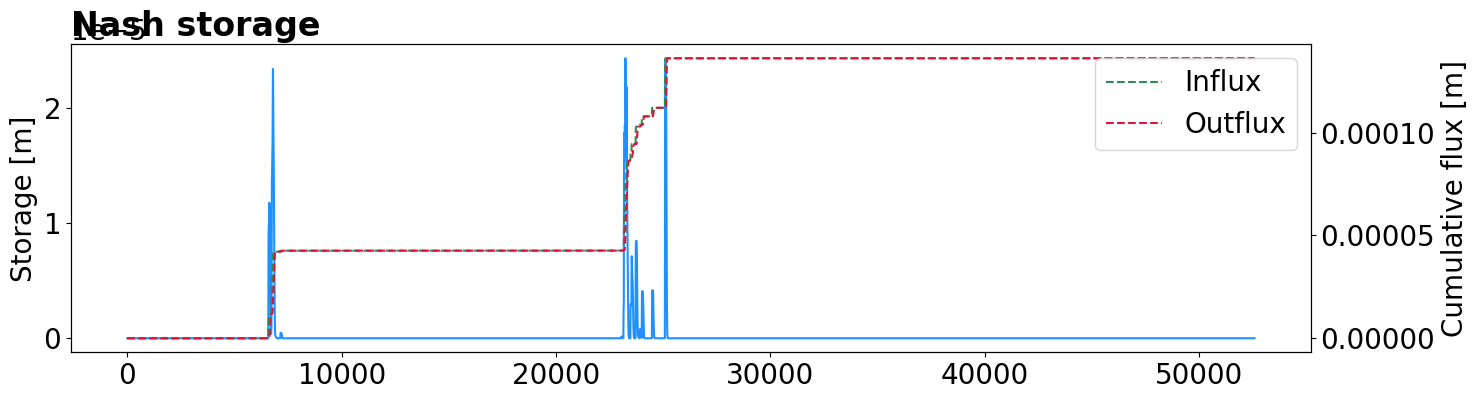

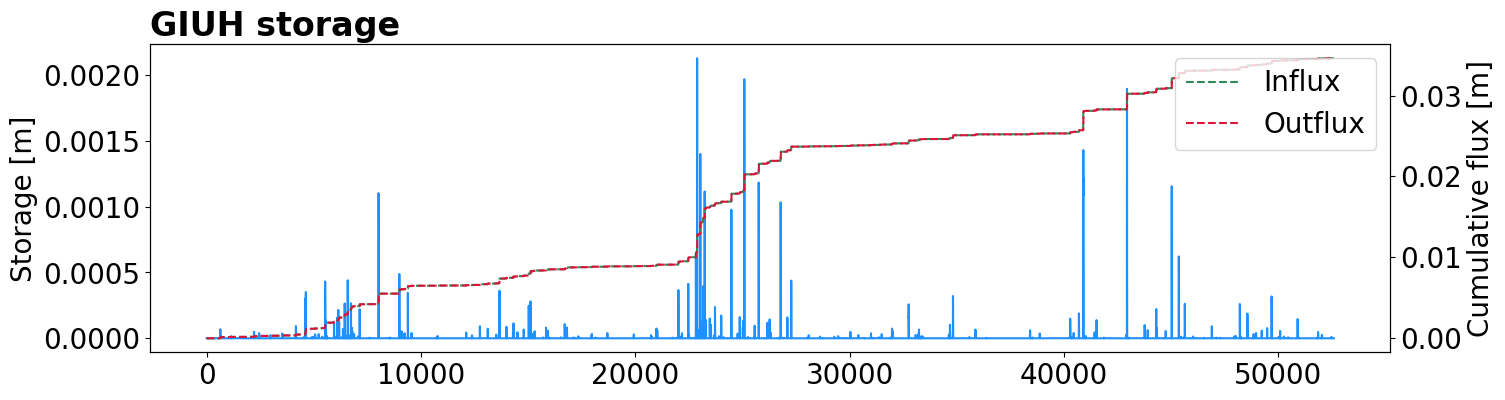


GLOBAL MASS BALANCE
      initial volume:   0.3925
        volume input:   5.9018
       volume output:   6.1664
        final volume:   0.1280
            residual: 1.0603e-14
Cumulative discharge: 0.74
        Runoff ratio: 0.13

 AET & PET
      volume PET:  14.4689
      volume AET:   5.4227
ET from rainfall:   0.6505
    ET from soil:   4.7722

SCHAAKE MASS BALANCE
    volume input:   5.9018
ET from rainfall:   0.6505
  surface runoff:   0.0346
             IOF:   0.0346
             SOF:   0.0000
    infiltration:   5.2168
schaake residual: -1.9540e-14

GIUH MASS BALANCE
  vol. into giuh:   0.0346
   vol. out giuh:   0.0346
 vol. end giuh q:   0.0000
   giuh residual: 6.2450e-17

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.1893
  vol. into soil:   5.2168
vol.soil2latflow:   0.0001
 vol. soil to gw:   0.5058
 vol. soil to ET:   4.7722
 final vol. soil:   0.1279
vol. soil resid.: 2.0428e-14

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   

In [3]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(plot=True, print_fluxes=False, warm_up=True)
cfe_instance.finalize(print_mass_balance=True)